In [1]:
from netCDF4 import Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy
from mpl_toolkits.axes_grid1 import AxesGrid

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.feature import NaturalEarthFeature
from matplotlib.cm import get_cmap
import os

#For WRF
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                 cartopy_ylim, latlon_coords, interplevel, vertcross, CoordPair, GeoBounds)
#For shapefile
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

In [2]:
path_shp='/home/hector/PYTHON/shapefiles/Peru/Departamental/'
fname_shp = path_shp+'DEPARTAMENTOS.shp'


In [3]:
def coords(ncfile,path):
    PATH=str(path)
    files=str(ncfile)
    file=Dataset(path+files)
    lat=file.variables['XLAT'][0,:,:]
    lon=file.variables['XLONG'][0,:,:]
    return lat, lon, file

In [4]:
#the function coords gives lat, lon and file, you have to enter here the name file and the path where your file is
lat, lon, file = coords('wrfout_d02_2020-04-01_00:00:00','/home/hector/Build_WRF/WRF-4.1.5/run/')

In [8]:
def plot_one(data):
    fig = plt.figure(figsize=(10,10))
    ax = plt.subplot(111)
    prj = ccrs.PlateCarree()
    # Set the GeoAxes to the projection used 
    ax = plt.axes(projection=prj)
    #SHAPE
    adm1_shapes = list(Reader(fname_shp).geometries())
    ax.add_geometries(adm1_shapes,ccrs.PlateCarree(),edgecolor='black', facecolor='none', alpha=0.5)
    # Make the contour
    clev = np.arange(0,35,2) #Contour levels
    #plot data
    #cmap: get_cmap("jet"), plt.cm.BrBG, plt.cm.rainbow
    im= ax.contourf(lon, lat, data, clev,
                  transform=prj,cmap=plt.cm.rainbow)
    #set map limits 
    #ax.set_xlim(lon.min(),lon.max())
    #ax.set_ylim(lat.min(),lat.max())
    
    #another limits (if you want to make your own limits)
    ax.set_xlim(-78,-75.3)
    ax.set_ylim(-9,-5.3)
    # Add grid lines
    grdl = ax.gridlines(crs=prj, draw_labels=True,
                        linewidth=1, color='black', alpha=0.5, linestyle='dotted')
    grdl.xlabels_top = False
    grdl.ylabels_left = True
    grdl.ylabels_right = False
    grdl.xlines = True
    grdl.xformatter = LONGITUDE_FORMATTER
    grdl.yformatter = LATITUDE_FORMATTER
    
    # Save figure
    plt.title('WRF, Temperature at 2m',size=18)
    plt.savefig('WRF-Temperature.png')
    cb_ax = fig.add_axes([.91,.170,.03,.665])
    cbar = plt.colorbar(im,orientation='vertical',cax= cb_ax)
    cbar.set_label('Temperature ($^{\circ}$ C)',size=18)
    
    # mark a known place to help us geo-locate ourselves
    ax.plot(-76.72774, -7.17697, 'o',color= 'black', markersize=8, transform=ccrs.Geodetic())
    ax.text(-76.7, -7.1, 'Juanjui', transform=ccrs.Geodetic(),fontweight="bold")
         
    return plt.show()

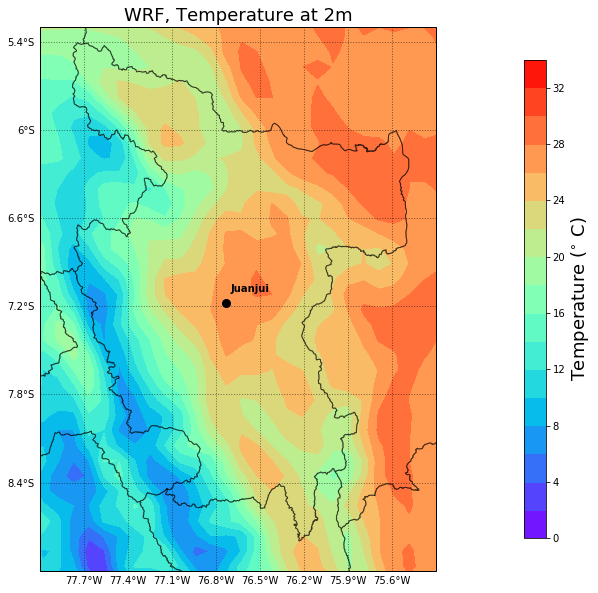

In [9]:
data = file.variables['T2'][23,:,:] -273
plot_one(data)